<a href="https://colab.research.google.com/github/aditi10998/Book_recommendation_system/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

Content
The Book-Crossing dataset comprises 3 files.

● Users:

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books:

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings:

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

### **Important Libraries**

In [3]:
#importing important libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Loading files from google drive to colab and storing in a variable.
File1="/content/drive/MyDrive/Book_Recommendation_System/Copy of Books.csv"
File2="/content/drive/MyDrive/Book_Recommendation_System/Copy of Ratings.csv"
File3="/content/drive/MyDrive/Book_Recommendation_System/Copy of Users.csv"

In [6]:
#Creating Dataframes from csv files
Books_df=pd.read_csv(File1,low_memory=False)
Ratings_df=pd.read_csv(File2,low_memory=False)
Users_df=pd.read_csv(File3,low_memory=False)

### **Peeking the data**

In [7]:
#To display first five rows of dataset
Books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


**Findings**:Books_df contains all the information related to books like ISBN usually used for identification,title of the book,when was book published and image urls obtained from amazon website.

In [8]:
#To display first five rows of dataset
Ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Findings:**Ratings_df contains rating for the books.

In [9]:
#To display first five rows of dataset
Users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**Findings:**user_df contains unique user IDs for each user with their location and Age.
Also we can see some null values in this dataset.

**Shape of the datasets**

In [10]:
#Shape of books dataset
Books_df.shape


(271360, 8)

**Findings:**Books dataset consists of 271360 rows and 8 columns

In [11]:
#Shape of ratings dataset
Ratings_df.shape


(1149780, 3)

**Findings**:Ratings dataset consists of 1149780 rows and 3 columns

In [12]:
#Shape of Users dataset
Users_df.shape

(278858, 3)

**Findings:** We can see that, Books_df contains 271360 rows and 8 columns.Ratings_df contains 1149780 rows and 3 columns and Users_df contains 278858 rows and 3 columns.

**Gathering all the information about datasets**

In [13]:
#To get on overview of some other information related data
Books_df.info()
print("--------------------------------------------------------")
Ratings_df.info()
print("--------------------------------------------------------")
Users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Boo

**Findings:**Previously we have seen the number of columns and rows in our datasets.Here we can see some additional information like dtypes and memory usage too.


## **Feature Engineering**

In [14]:
#Checking null values
Books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [15]:
#Checking null values
Ratings_df.isnull().sum()


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [16]:
#Checking null values
Users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

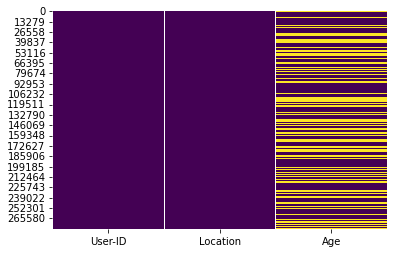

In [17]:
#Heatmap for null values
sns.heatmap(Users_df.isnull(),cbar=False,cmap='viridis')

**Conclusion:**Here we can conclude that there are minor amount of null values in books dataset and there are 110762 null values in users dataset.

In [18]:
#Removing all the rows with missing data in books dataset
Books_df.dropna()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [19]:
#To consider only those values of age which are valid
print(sorted(Users_df.Age.unique()))


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [20]:
#eliminating invalid ages 
Users_df.loc[(Users_df.Age < 8) | (Users_df.Age > 90), 'Age'] = np.nan 
Users_df.Age = Users_df.Age.fillna(Users_df.Age.mean())
Users_df.Age = Users_df.Age.astype(np.int32)


**Conclusion:**Here we have filled all the missing values with their respective mean and converted it into integer datatype from float.
Also we have rendered only valid age from this column

In [21]:
#Displaying age which are filtered
Users_df.Age.unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8, 81, 10, 84, 82, 90, 85, 86, 87, 89, 88],
      dtype=int32)

**Checking Duplicates**

In [22]:
#To check duplicates in dataset
Books_df.duplicated().sum()

0

In [23]:
#Checking null values
Ratings_df.duplicated().sum()

0

In [24]:
#Checking null values
Users_df.duplicated().sum()

0

We have no duplicates in our datasets.

In [26]:
#To display columns of books dataset
Books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

# **Data Visualizations**

## **Top 15 Books by an Author**

Text(0.5, 1.0, 'Top 15 books by an Author')

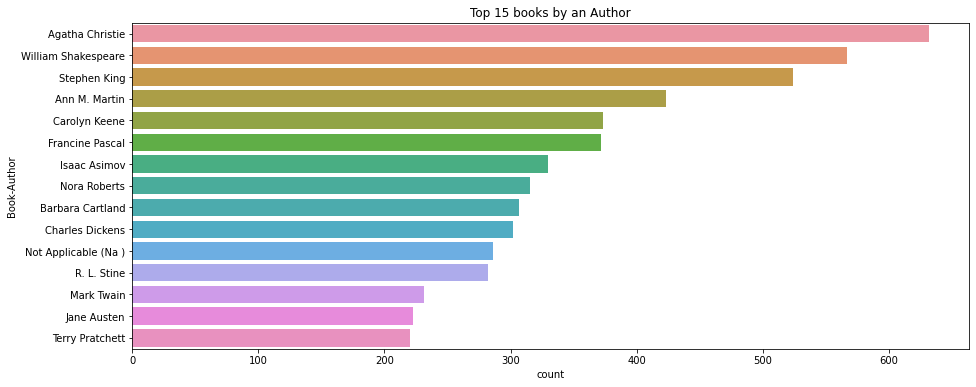

In [27]:
#To check top 15 Author
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=Books_df,order=Books_df['Book-Author'].value_counts().index[0:15])
plt.title("Top 15 books by an Author")


**Conclusion:**
In top 15 authors Agatha Christie tops the list while Mark Twain,Jane Austen and Terry Prachett are in the bottom of the list  

## **Top 15 Books published by a publisher**

Text(0.5, 1.0, 'Top 15 Books published by a publisher')

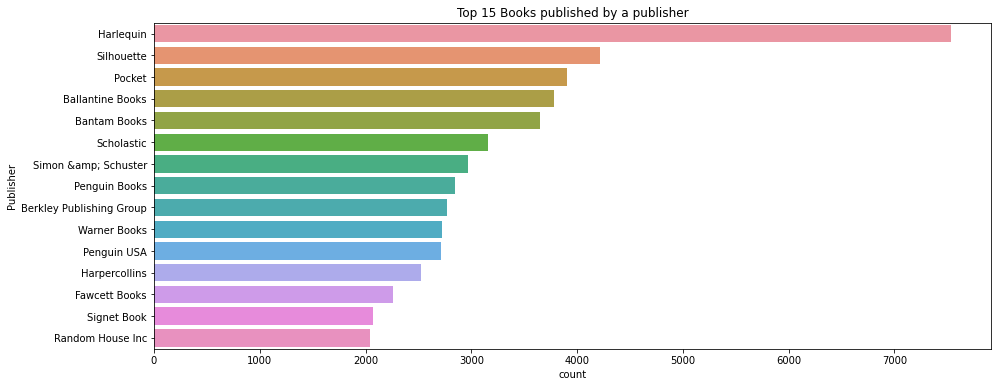

In [28]:
#To display top 15 books published by a publisher
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=Books_df,order=Books_df['Publisher'].value_counts().index[0:15])
plt.title("Top 15 Books published by a publisher")


**Conclusion:**Top 15 books published by a publisher has Harlequin at top and Random House Inc at the bottom.

## **Distribution of ratings on books**

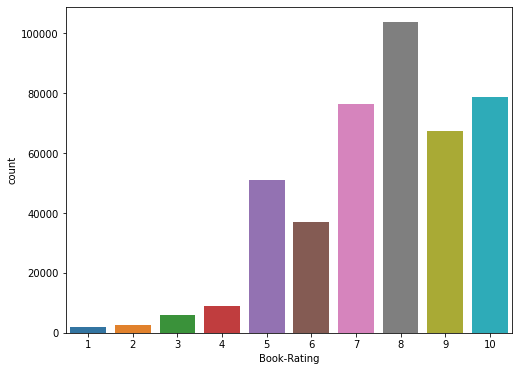

In [29]:
#countplot for distribution of ratings on books
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data = Ratings_df[Ratings_df['Book-Rating'] != 0])


**Conclusion**:Most books are rated above 7 and as we can see in figure all books has mixed-kind of ratings.

### **Top 15 most popular books**

Text(0.5, 1.0, 'Top 15 most popular Books')

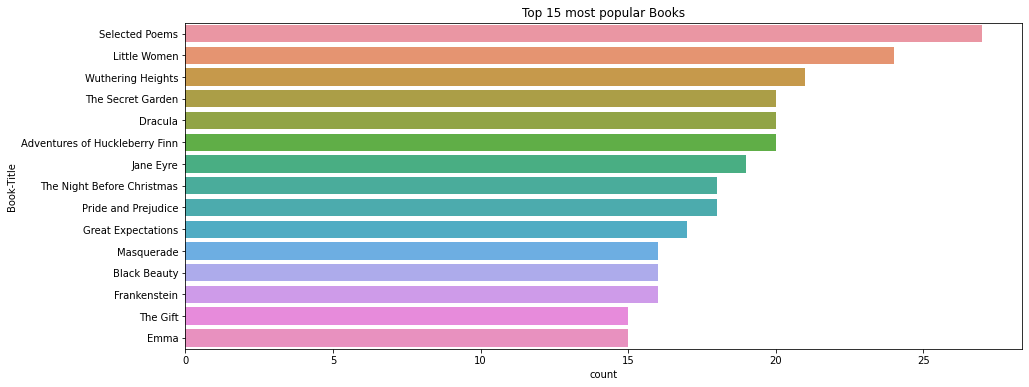

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Title", data=Books_df,order=Books_df['Book-Title'].value_counts().index[0:15])
plt.title("Top 15 most popular Books")

**Conclusion:**Selected Poems are in the top of 15 most popular books.While The gift,Emma and Frankenstein are in bottom five books.


### **  **Preparing Datasets for creating Recommender** **

In [30]:
#Eliminating extra columns which we do not need
Books_df=Books_df[['ISBN','Book-Title','Book-Author','Year-Of-Publication','Publisher']]

In [31]:
#Renaming columns for easy access to them
Books_df.rename(columns={'Book-Title':'Title','Book-Author':'Author','Year-Of-Publication':'Year','Publisher':'Publisher'},inplace=True)

In [32]:
#Renaming columns for easy access to them
Users_df.rename(columns={'User-ID':'user_id','Location':'location'},inplace=True)


In [33]:
#To check the changes
Users_df.head(2)

,user_id,location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18


In [34]:
#Renaming columns for easy access to them
Ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True)

In [35]:
#To check the changes
Ratings_df.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [36]:
#To find unique users who have rated books
Ratings_df['user_id'].value_counts().shape

(105283,)

To identify unique users is necessary because every user who reads the books don't rate the books or there can be chances who don't even finish reading the books.



*  **Taking only those users who have rated more than 200 books**



In [40]:
#To count users which have rated more than 200 books
x=Ratings_df['user_id'].value_counts()>200

In [41]:
#Store the index
y=x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             88793, 274808,  44296,  28634,  73681,  59727, 188951, 268622,
              9856, 155916],
           dtype='int64', length=899)

In [42]:
#Storing users which have rated more than 200 books in Ratings dataset
Ratings_df=Ratings_df[Ratings_df['user_id'].isin(y)]

In [43]:
#to check rows and columns after making changes
Ratings_df.shape

(526356, 3)

In [44]:
#Merging ratings and books
Ratings_Books_df=Ratings_df.merge(Books_df,on='ISBN')

In [ ]:
Ratings_Books_df

,user_id,ISBN,rating,Title,Author,Year,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [45]:
#Checking rows and columns of new formed datasets
Ratings_Books_df.shape

(487671, 7)

In [46]:
#grouping ratings by title column
Number_Rating=Ratings_Books_df.groupby('Title')['rating'].count().reset_index()

In [47]:
#renaming rating to No_of_Ratings
Number_Rating.rename(columns={'rating':'No_of_Ratings'},inplace=True)

In [48]:
#Displaying Number_Rating
Number_Rating

,Title,No_of_Ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [49]:
#Merging with respect to title and storing it into final_rating_df
final_rating_df=Ratings_Books_df.merge(Number_Rating,on='Title')

In [50]:
#To check rows and columns of new formed dataset
final_rating_df.shape

(487671, 8)





* **Books which has ratings more than 50**




In [51]:
#To display only those books who have ratings more than 50
final_rating_df=final_rating_df[final_rating_df['No_of_Ratings']>=50]

In [52]:
#To display rows and columns of dataset
final_rating_df.shape

(61853, 8)

In [53]:
#Dropping all the duplicates
final_rating_df.drop_duplicates(['user_id','Title'],inplace=True)

In [54]:
# Checking rows and columns after making changes
final_rating_df.shape

(59850, 8)

**Creating pivot table**



In [55]:
#Creating pivot table
book_pivot=final_rating_df.pivot_table(columns='user_id',index='Title',values='rating')

In [56]:
#filling null values with 0
book_pivot.fillna(0,inplace=True)

In [57]:
#Displaying pivot table
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Applying KNN**

In [58]:
#For sparse matrix
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)

In [59]:
#To check type of created sparse matrix
type(book_sparse)

scipy.sparse.csr.csr_matrix

Here the purpose of creating sparse matrix is to consider only non-zeros values and eliminating all the zeros

In [60]:
#For k-means algorithm
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')

In [61]:
#Fitting the model
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [62]:
#Randomly displaying book by their index
book_pivot.index[54]

'Animal Farm'

In [63]:
#For giving suggestions
distances,suggestions=model.kneighbors(book_pivot.iloc[54,:].values.reshape(1,-1),n_neighbors=6)

In [64]:
#looping the suggestions using for loop
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='Title')


In [68]:
#To find book with title
np.where(book_pivot.index=='Animal Farm')[0][0]

54

In [69]:
#Function for recommending books
def recommendation_book(book_name):
  book_id=np.where(book_pivot.index==book_name)[0][0]
  distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The Suggestions for",book_name,"are:")

    if not i:
      print(book_pivot.index[suggestions[i]])


In [70]:
#recommendations for given book
recommendation_book('Animal Farm')

The Suggestions for Animal Farm are:
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Second Nature',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='Title')


In [71]:
#Randomly displaying book using index
book_pivot.index[13]

'A Great Deliverance'

In [72]:
#Recommendations for a given book
recommendation_book('A Great Deliverance')

The Suggestions for A Great Deliverance are:
Index(['A Great Deliverance', 'Exclusive', 'No Safe Place',
       'Jacob Have I Loved', 'Debt of Honor (Jack Ryan Novels)',
       'The Little Friend'],
      dtype='object', name='Title')
